<a href="https://colab.research.google.com/github/vjbarayuga/Week7-Classification_Models/blob/main/Wine_Cultivars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#X = data[['radius_mean', 'concave points_mean']]
#y = data['diagnosis']
#y = y.map({'M':1, 'B':0})

In [1]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import cycle, islice
%matplotlib inline

In [82]:
# open filename
df = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/04_Classification_Models/DATASET/wine_cultivars.csv')
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [84]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

2    71
1    59
3    48
Name: Class label, dtype: int64
12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: Alcohol, Length: 126, dtype: int64
1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: Malic Acid, Length: 133, dtype: int64
2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name: Ash, Length: 79, dtype: int64
20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name: Alcalinity of ash, Length: 63, dtype: int64
88     13
86     11
101     9
98      9
96      8
102     7
112     6
94      6
85      6
97      5
80      5
92      5
103     5
89      5
90      4
108     4
107     4
106     4
120     3
118     3
116     3
87      3
100     3
84      3
111     3
110     3
78      3
104     3
95      3
105     2
93      2
1

In [85]:
# distribution of the classes
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [86]:
df.columns

Index(['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [87]:
df.shape

(178, 14)

In [88]:
df.describe()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [89]:
df.isin(['?']).sum()

Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonid phenols             0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [90]:
df = df.replace('?', np.NaN)

In [91]:
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonid phenols             0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [92]:
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [93]:
df['Class label'].unique()

array([1, 2, 3])

In [94]:
df['Alcohol'].unique()

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

In [95]:
df['Malic Acid'].unique()

array([1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1.64, 1.35, 2.16,
       1.48, 1.73, 1.81, 1.92, 1.57, 1.59, 3.1 , 1.63, 3.8 , 1.86, 1.6 ,
       2.05, 1.77, 1.72, 1.9 , 1.68, 1.5 , 1.66, 1.83, 1.53, 1.8 , 1.65,
       3.99, 3.84, 1.89, 3.98, 4.04, 3.59, 2.02, 1.75, 1.67, 1.7 , 1.97,
       1.43, 0.94, 1.1 , 1.36, 1.25, 1.13, 1.45, 1.21, 1.01, 1.17, 1.19,
       1.61, 1.51, 1.09, 1.88, 0.9 , 2.89, 0.99, 3.87, 0.92, 3.86, 0.89,
       0.98, 2.06, 1.33, 2.83, 1.99, 1.52, 2.12, 1.41, 1.07, 3.17, 2.08,
       1.34, 2.45, 2.55, 1.29, 3.74, 2.43, 2.68, 0.74, 1.39, 1.47, 3.43,
       2.4 , 4.43, 5.8 , 4.31, 2.13, 4.3 , 2.99, 2.31, 3.55, 1.24, 2.46,
       4.72, 5.51, 2.96, 2.81, 2.56, 4.95, 3.88, 3.57, 5.04, 4.61, 3.24,
       3.9 , 3.12, 2.67, 3.3 , 5.19, 4.12, 3.03, 3.83, 3.26, 3.27, 3.45,
       2.76, 4.36, 3.7 , 3.37, 2.58, 4.6 , 2.39, 2.51, 5.65, 3.91, 4.28,
       4.1 ])

In [96]:
df['Ash'].unique()

array([2.43, 2.14, 2.67, 2.5 , 2.87, 2.45, 2.61, 2.17, 2.27, 2.3 , 2.32,
       2.41, 2.39, 2.38, 2.7 , 2.72, 2.62, 2.48, 2.56, 2.28, 2.65, 2.36,
       2.52, 3.22, 2.8 , 2.21, 2.84, 2.55, 2.1 , 2.51, 2.31, 2.12, 2.59,
       2.29, 2.44, 2.4 , 2.04, 2.6 , 2.42, 2.68, 2.25, 2.46, 1.36, 2.02,
       1.92, 2.16, 2.53, 1.7 , 1.75, 2.24, 1.71, 2.23, 1.95, 2.  , 2.2 ,
       2.58, 2.26, 2.22, 2.74, 1.98, 1.9 , 1.88, 1.94, 1.82, 2.92, 1.99,
       2.19, 3.23, 2.73, 2.13, 2.78, 2.54, 2.64, 2.35, 2.15, 2.75, 2.69,
       2.86, 2.37])

In [97]:
df['Alcalinity of ash'].unique()

array([15.6, 11.2, 18.6, 16.8, 21. , 15.2, 14.6, 17.6, 14. , 16. , 18. ,
       11.4, 12. , 17.2, 20. , 16.5, 16.6, 17.8, 25. , 16.1, 17. , 19.4,
       22.5, 19.1, 19.5, 19. , 20.5, 15.5, 13.2, 16.2, 18.8, 15. , 17.5,
       18.9, 17.4, 12.4, 17.1, 16.4, 16.3, 16.7, 10.6, 18.1, 19.6, 20.4,
       24. , 30. , 14.8, 23. , 22.8, 26. , 21.6, 23.6, 18.5, 22. , 20.7,
       21.5, 20.8, 28.5, 26.5, 24.5, 23.5, 25.5, 27. ])

In [98]:
df['Magnesium'].unique()

array([127, 100, 101, 113, 118, 112,  96, 121,  97,  98, 105,  95,  89,
        91, 102, 120, 115, 108, 116, 126, 124,  93,  94, 107, 106, 104,
       132, 110, 128, 117,  90, 103, 111,  92,  88,  87,  78, 151,  86,
       139, 136,  85,  99,  84,  70,  81,  80, 162, 134, 119,  82, 122,
       123])

In [99]:
df['Total phenols'].unique()

array([2.8 , 2.65, 3.85, 3.27, 2.5 , 2.6 , 2.98, 2.95, 2.2 , 3.1 , 3.3 ,
       2.85, 2.7 , 3.  , 2.41, 2.61, 2.48, 2.53, 2.63, 2.4 , 2.86, 2.42,
       2.35, 2.45, 3.15, 3.25, 2.64, 2.75, 2.88, 2.72, 3.88, 2.96, 3.2 ,
       3.4 , 1.98, 2.05, 2.02, 2.1 , 3.5 , 1.89, 2.11, 1.85, 1.1 , 1.88,
       3.38, 1.61, 1.95, 1.72, 1.9 , 2.83, 2.  , 1.65, 1.78, 1.92, 1.6 ,
       1.45, 1.38, 3.02, 2.55, 3.52, 2.23, 2.56, 1.68, 2.36, 2.74, 3.18,
       1.75, 2.46, 1.63, 2.9 , 2.62, 2.13, 2.22, 1.51, 1.3 , 1.15, 1.7 ,
       1.62, 1.79, 2.32, 1.54, 1.4 , 1.55, 1.5 , 0.98, 1.93, 1.41, 1.48,
       1.8 , 1.74, 2.3 , 1.83, 1.39, 1.35, 1.28, 1.25, 1.59])

In [100]:
df['Flavanoids'].unique()

array([3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2.98, 3.15, 3.32,
       2.43, 3.69, 3.64, 2.91, 3.14, 3.4 , 3.93, 3.03, 3.17, 2.41, 2.88,
       2.37, 2.61, 2.68, 2.94, 2.19, 2.97, 2.33, 3.25, 3.19, 2.74, 2.53,
       2.64, 3.04, 3.29, 3.56, 2.63, 3.  , 2.65, 2.92, 3.54, 3.27, 2.99,
       3.74, 2.79, 2.9 , 2.78, 3.23, 3.67, 0.57, 1.09, 1.41, 1.79, 3.1 ,
       1.75, 3.18, 2.  , 1.3 , 1.28, 1.02, 2.86, 1.84, 2.89, 2.14, 1.57,
       2.03, 1.32, 1.85, 2.55, 2.26, 1.58, 1.59, 2.21, 1.94, 1.69, 1.61,
       1.5 , 1.25, 1.46, 2.25, 2.27, 0.99, 2.5 , 3.75, 2.17, 1.36, 2.11,
       1.64, 1.92, 1.76, 2.04, 2.58, 2.01, 2.29, 1.6 , 2.09, 5.08, 2.13,
       2.24, 2.45, 1.22, 1.2 , 0.58, 0.66, 0.47, 0.6 , 0.48, 0.5 , 0.52,
       0.8 , 0.78, 0.55, 0.34, 0.65, 0.76, 1.39, 0.83, 0.63, 1.31, 1.1 ,
       0.92, 0.56, 0.7 , 0.68, 0.84, 0.96, 0.49, 0.51, 0.61, 0.75, 0.69])

In [101]:
df['Nonflavonid phenols'].unique()

array([0.28, 0.26, 0.3 , 0.24, 0.39, 0.34, 0.31, 0.29, 0.22, 0.43, 0.33,
       0.4 , 0.32, 0.17, 0.25, 0.27, 0.47, 0.37, 0.42, 0.5 , 0.2 , 0.21,
       0.19, 0.63, 0.53, 0.45, 0.55, 0.14, 0.13, 0.35, 0.61, 0.48, 0.52,
       0.58, 0.66, 0.6 , 0.41, 0.44, 0.56])

In [102]:
df['Proanthocyanins'].unique()

array([2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.25, 1.85, 2.38, 1.57,
       1.81, 2.96, 1.46, 1.72, 1.86, 1.66, 2.1 , 1.69, 1.92, 1.45, 1.35,
       1.76, 1.95, 1.54, 1.36, 1.44, 1.37, 2.08, 2.34, 1.48, 1.7 , 2.03,
       2.19, 2.14, 2.91, 1.87, 1.68, 1.62, 2.45, 2.04, 0.42, 0.41, 0.62,
       0.73, 1.03, 2.28, 1.04, 2.5 , 1.96, 1.65, 1.15, 0.95, 2.76, 1.43,
       1.77, 1.4 , 2.35, 1.56, 1.34, 1.38, 1.64, 1.63, 1.99, 3.28, 1.31,
       1.42, 2.49, 3.58, 1.22, 1.05, 2.01, 1.53, 1.61, 0.83, 1.83, 1.71,
       1.9 , 0.94, 0.84, 0.8 , 1.1 , 0.88, 0.81, 0.75, 0.64, 0.55, 1.02,
       1.14, 1.3 , 0.68, 0.86, 1.26, 1.55, 2.7 , 0.96, 0.97, 1.11, 1.24,
       1.06, 1.41])

In [103]:
df['Color intensity'].unique()

array([ 5.64    ,  4.38    ,  5.68    ,  7.8     ,  4.32    ,  6.75    ,
        5.25    ,  5.05    ,  5.2     ,  7.22    ,  5.75    ,  5.      ,
        5.6     ,  5.4     ,  7.5     ,  7.3     ,  6.2     ,  6.6     ,
        8.7     ,  5.1     ,  5.65    ,  4.5     ,  3.8     ,  3.93    ,
        3.52    ,  3.58    ,  4.8     ,  3.95    ,  4.7     ,  5.7     ,
        6.9     ,  3.84    ,  4.2     ,  4.6     ,  4.25    ,  3.7     ,
        6.13    ,  4.28    ,  5.43    ,  4.36    ,  5.04    ,  5.24    ,
        4.9     ,  6.1     ,  8.9     ,  7.2     ,  7.05    ,  6.3     ,
        5.85    ,  6.25    ,  6.38    ,  6.      ,  6.8     ,  1.95    ,
        3.27    ,  4.45    ,  2.95    ,  5.3     ,  4.68    ,  3.17    ,
        2.85    ,  3.05    ,  3.38    ,  3.74    ,  3.35    ,  3.21    ,
        2.65    ,  3.4     ,  2.57    ,  2.5     ,  3.9     ,  2.2     ,
        2.62    ,  2.45    ,  2.6     ,  2.8     ,  1.74    ,  2.4     ,
        3.6     ,  2.15    ,  3.25    ,  2.9     , 

In [104]:
df['OD280/OD315 of diluted wines'].unique()

array([3.92, 3.4 , 3.17, 3.45, 2.93, 2.85, 3.58, 3.55, 2.82, 2.9 , 2.73,
       3.  , 2.88, 2.65, 2.57, 3.36, 3.71, 3.52, 4.  , 3.63, 3.82, 3.2 ,
       3.22, 2.77, 3.59, 2.71, 2.87, 3.47, 2.78, 2.51, 2.69, 3.53, 3.38,
       3.56, 3.35, 3.33, 3.44, 2.75, 3.1 , 2.91, 3.37, 3.26, 3.03, 3.31,
       2.84, 1.82, 1.67, 1.59, 2.46, 2.23, 2.3 , 3.18, 3.48, 1.93, 3.07,
       3.16, 3.5 , 3.13, 2.14, 2.48, 2.52, 2.31, 3.12, 3.14, 2.72, 2.01,
       3.08, 2.26, 3.21, 2.27, 2.06, 3.3 , 2.96, 2.63, 2.74, 2.83, 2.44,
       3.57, 2.42, 3.02, 2.81, 2.5 , 3.19, 2.12, 3.05, 3.39, 3.69, 3.64,
       3.28, 1.29, 1.42, 1.36, 1.51, 1.58, 1.27, 1.69, 2.15, 2.47, 2.05,
       2.  , 1.68, 1.33, 1.86, 1.62, 1.3 , 1.47, 1.55, 1.48, 1.64, 1.73,
       1.96, 1.78, 2.11, 1.75, 1.56, 1.8 , 1.92, 1.83, 1.63, 1.71, 1.74,
       1.6 ])

In [105]:
df['Proline'].unique()

array([1065, 1050, 1185, 1480,  735, 1450, 1290, 1295, 1045, 1510, 1280,
       1320, 1150, 1547, 1310, 1130, 1680,  845,  780,  770, 1035, 1015,
        830, 1195, 1285,  915, 1515,  990, 1235, 1095,  920,  880, 1105,
       1020,  760,  795,  680,  885, 1080,  985, 1060, 1260, 1265, 1190,
       1375, 1120,  970, 1270,  520,  450,  630,  420,  355,  678,  502,
        510,  750,  718,  870,  410,  472,  886,  428,  392,  500,  463,
        278,  714,  515,  495,  562,  625,  480,  290,  345,  937,  660,
        406,  710,  438,  415,  672,  315,  488,  312,  325,  607,  434,
        385,  407,  372,  564,  465,  365,  380,  378,  352,  466,  342,
        580,  530,  560,  600,  650,  695,  720,  590,  550,  855,  425,
        675,  640,  725,  620,  570,  615,  685,  470,  740,  835,  840])

In [106]:
df.dtypes

Class label                       int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavonid phenols             float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [30]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [33]:
#for col in df.columns:
#    if df[col].dtypes == 'float64':
#        df[col] = le.fit_transform(df[col])

In [107]:
df.isnull().sum()

Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonid phenols             0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [108]:
# rename columns
df.columns = ['class_id', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'non_flavanoid_phenols', 'proanthocyanins','color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'prolines' ]

In [109]:
df.head(10)

,class_id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,prolines
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


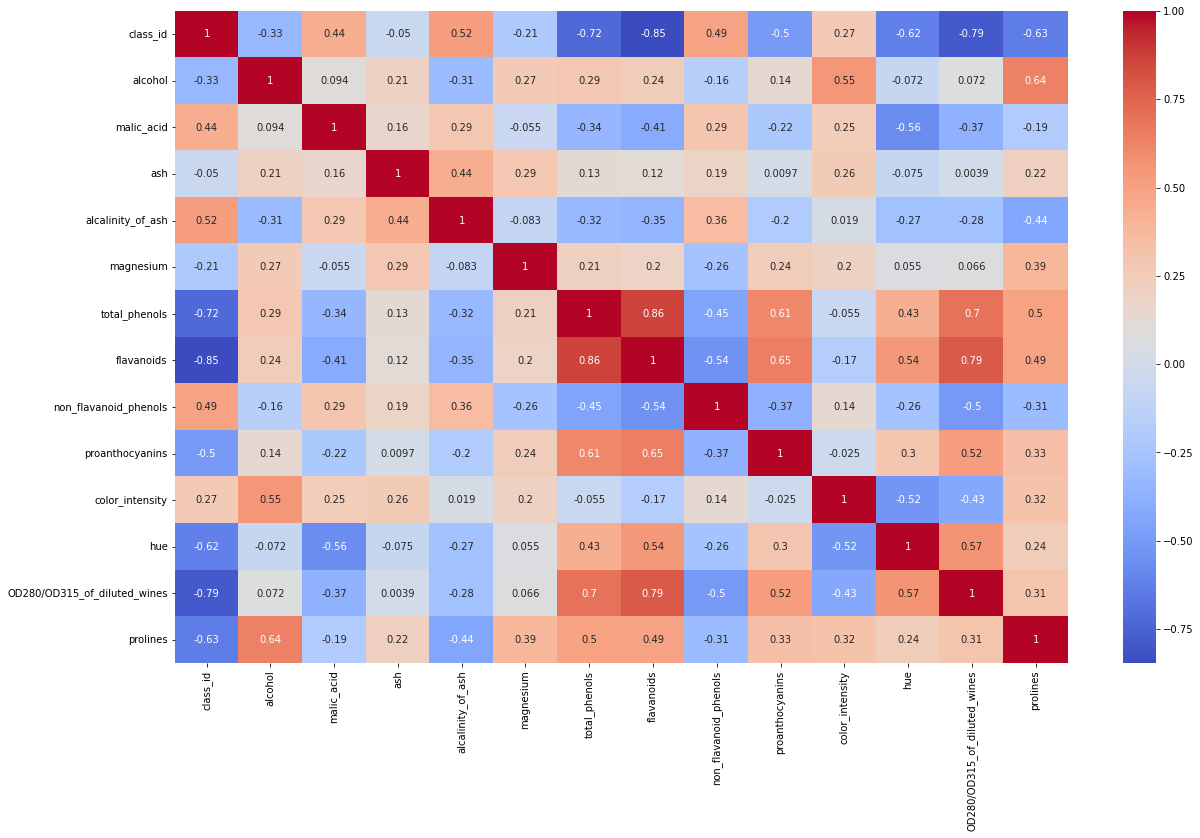

In [110]:
corrmat = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

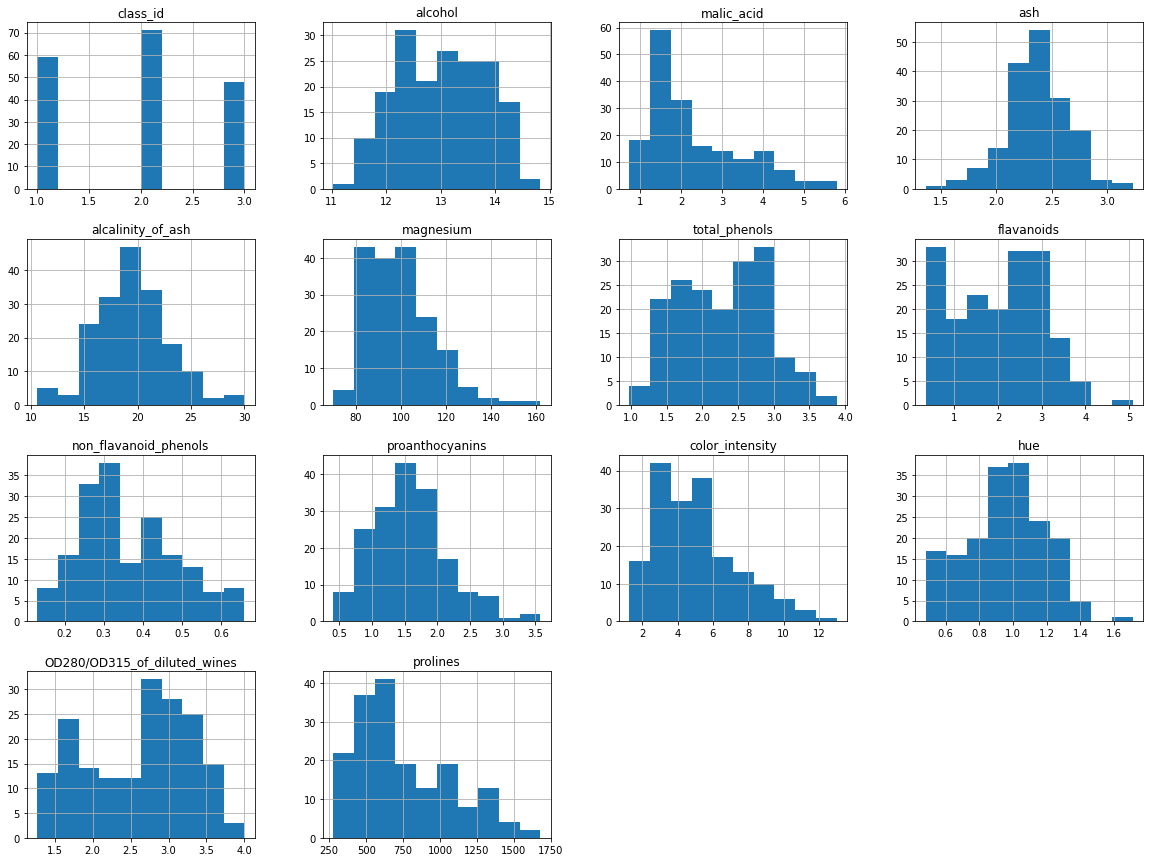

In [111]:
# UNIVARIATE GRAPHS
df.hist(figsize=(20, 15))
plt.show()

In [63]:
# Correlation Matrix
#plt.subplots(figsize=(20, 15))
#sns.heatmap(df.drop('Class label', axis=1).corr(), annot=True)

In [112]:
corrmat['class_id'].sort_values(ascending = False)

class_id                        1.000000
alcalinity_of_ash               0.517859
non_flavanoid_phenols           0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
prolines                       -0.633717
total_phenols                  -0.719163
OD280/OD315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: class_id, dtype: float64

In [138]:
#X = df.iloc[:,1:]
#y = df.iloc[:,0]

# get the features and target value
X = df.drop(columns = ['class_id'])
y = df['class_id']

In [139]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,prolines
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [140]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class_id, Length: 178, dtype: int64

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [143]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,non_flavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,prolines
8,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045
104,12.51,1.73,1.98,20.5,85,2.2,1.92,0.32,1.48,2.94,1.04,3.57,672
36,13.28,1.64,2.84,15.5,110,2.6,2.68,0.34,1.36,4.60,1.09,2.78,880
78,12.33,0.99,1.95,14.8,136,1.9,1.85,0.35,2.76,3.40,1.06,2.31,750
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [144]:
y_train.head()

8      1
104    2
36     1
78     2
2      1
Name: class_id, dtype: int64

In [145]:
l=[]
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression:', acc * 100)
l.append(acc)

Logistic Regression: 97.77777777777777


In [146]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Knn:',acc * 100)
l.append(acc)

Knn: 77.77777777777779


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Random Forest:',acc * 100)
l.append(acc)
print(cm(y_test, y_pred))
print(cr(y_test, y_pred))

Random Forest: 100.0
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Random Forest Performed well against the other classifier models